In [12]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

plt.rcParams['figure.figsize'] = [18, 15]
plt.style.use('fivethirtyeight')

sns.set(rc={'figure.figsize':(18, 15)})
sns.set_theme(style="darkgrid")

In [3]:
def get_top_n_gram(corpus, n=None, ngram_range=(1,1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [5]:
df = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\lemmatized.parquet")

In [7]:
df = df[df['category'] == 'LDS Enclaves']

In [47]:
common_words = get_top_n_gram(df['text_without_stopwords_freq'], 50)
all_words = get_top_n_gram(df['text_without_stopwords_freq'])

<AxesSubplot:title={'center':'Top 20 bigrams in Tweet before removing spams'}, xlabel='TweetText'>

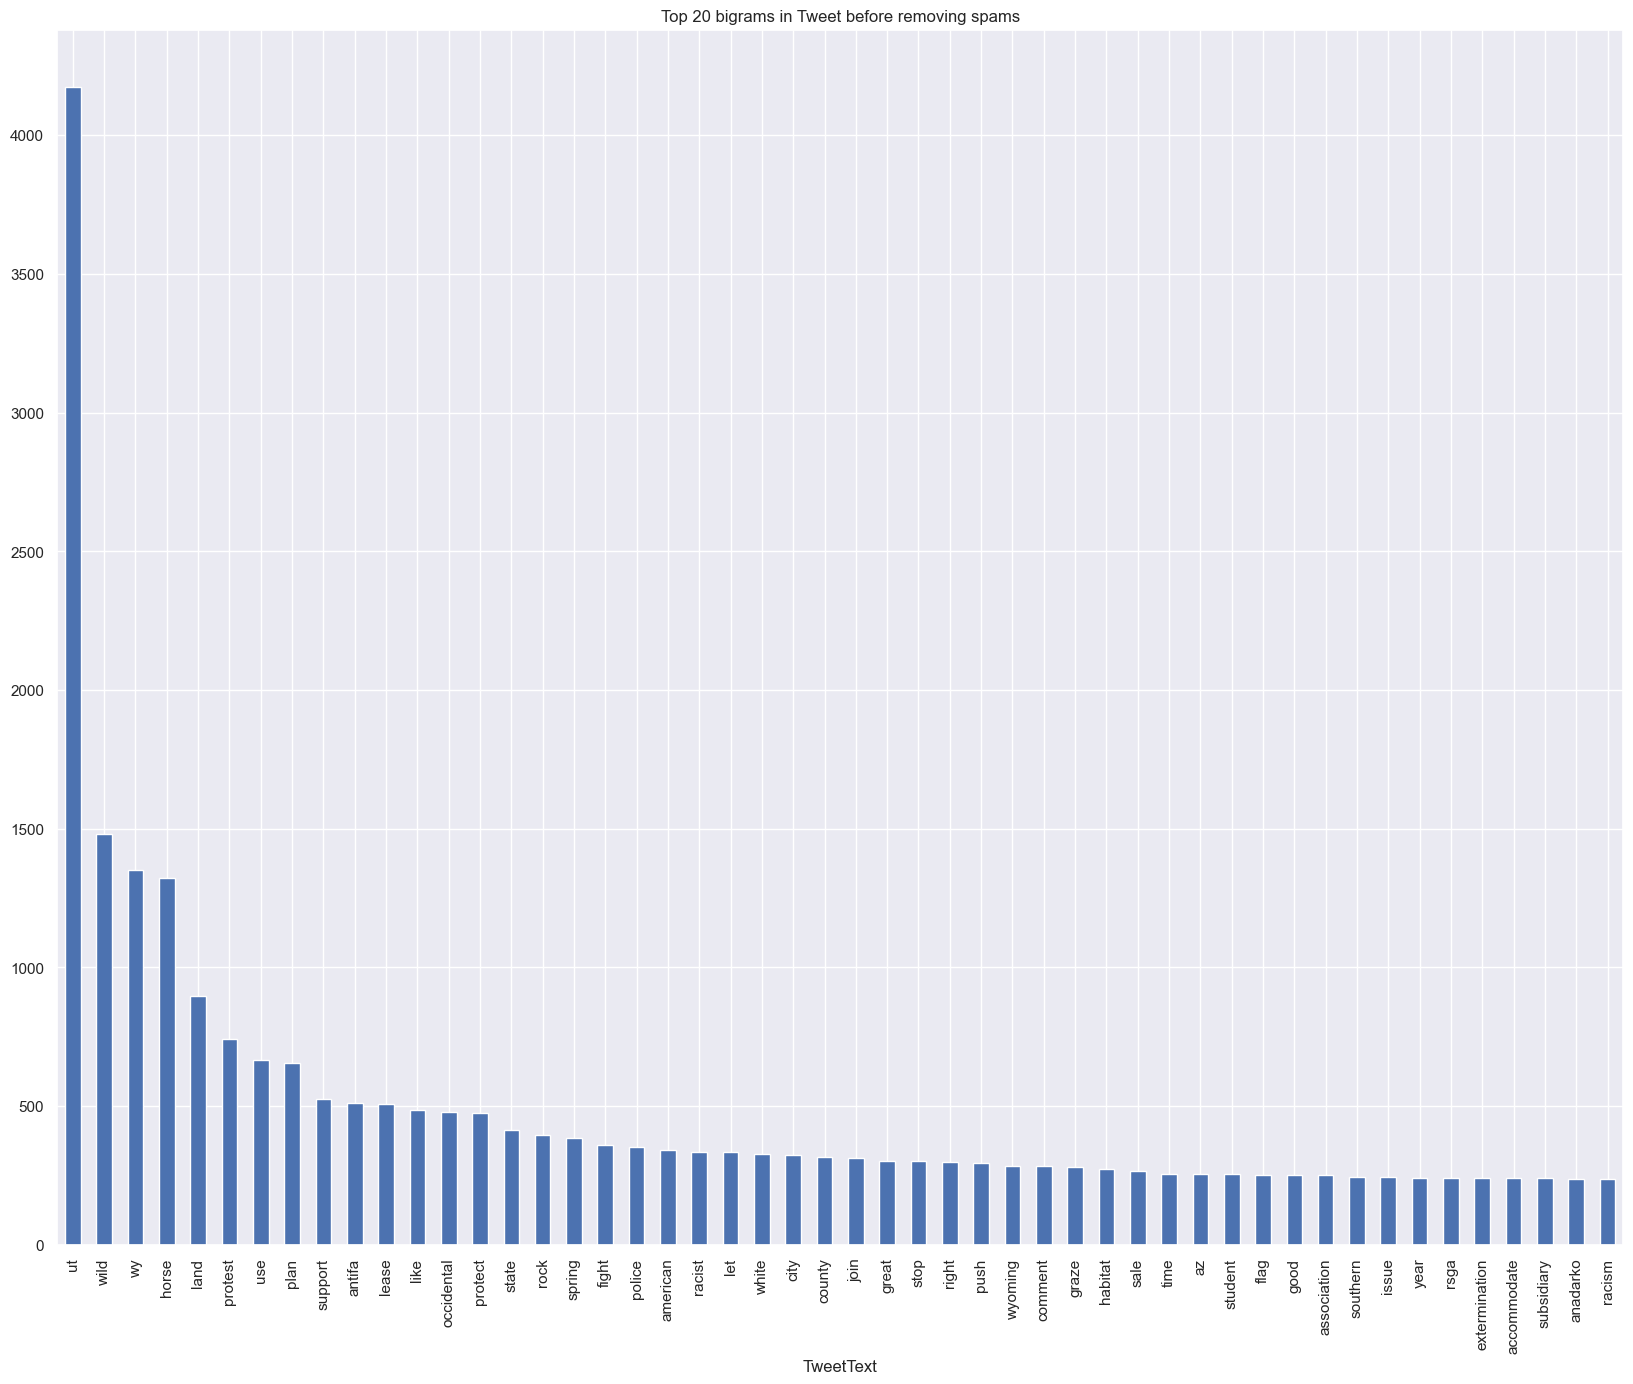

In [29]:
df1 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])
df1.groupby('TweetText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    title='Top 20 bigrams in Tweet before removing spams')

<AxesSubplot:title={'center':'Top 20 bigrams in Tweet before removing spams'}, xlabel='TweetText'>

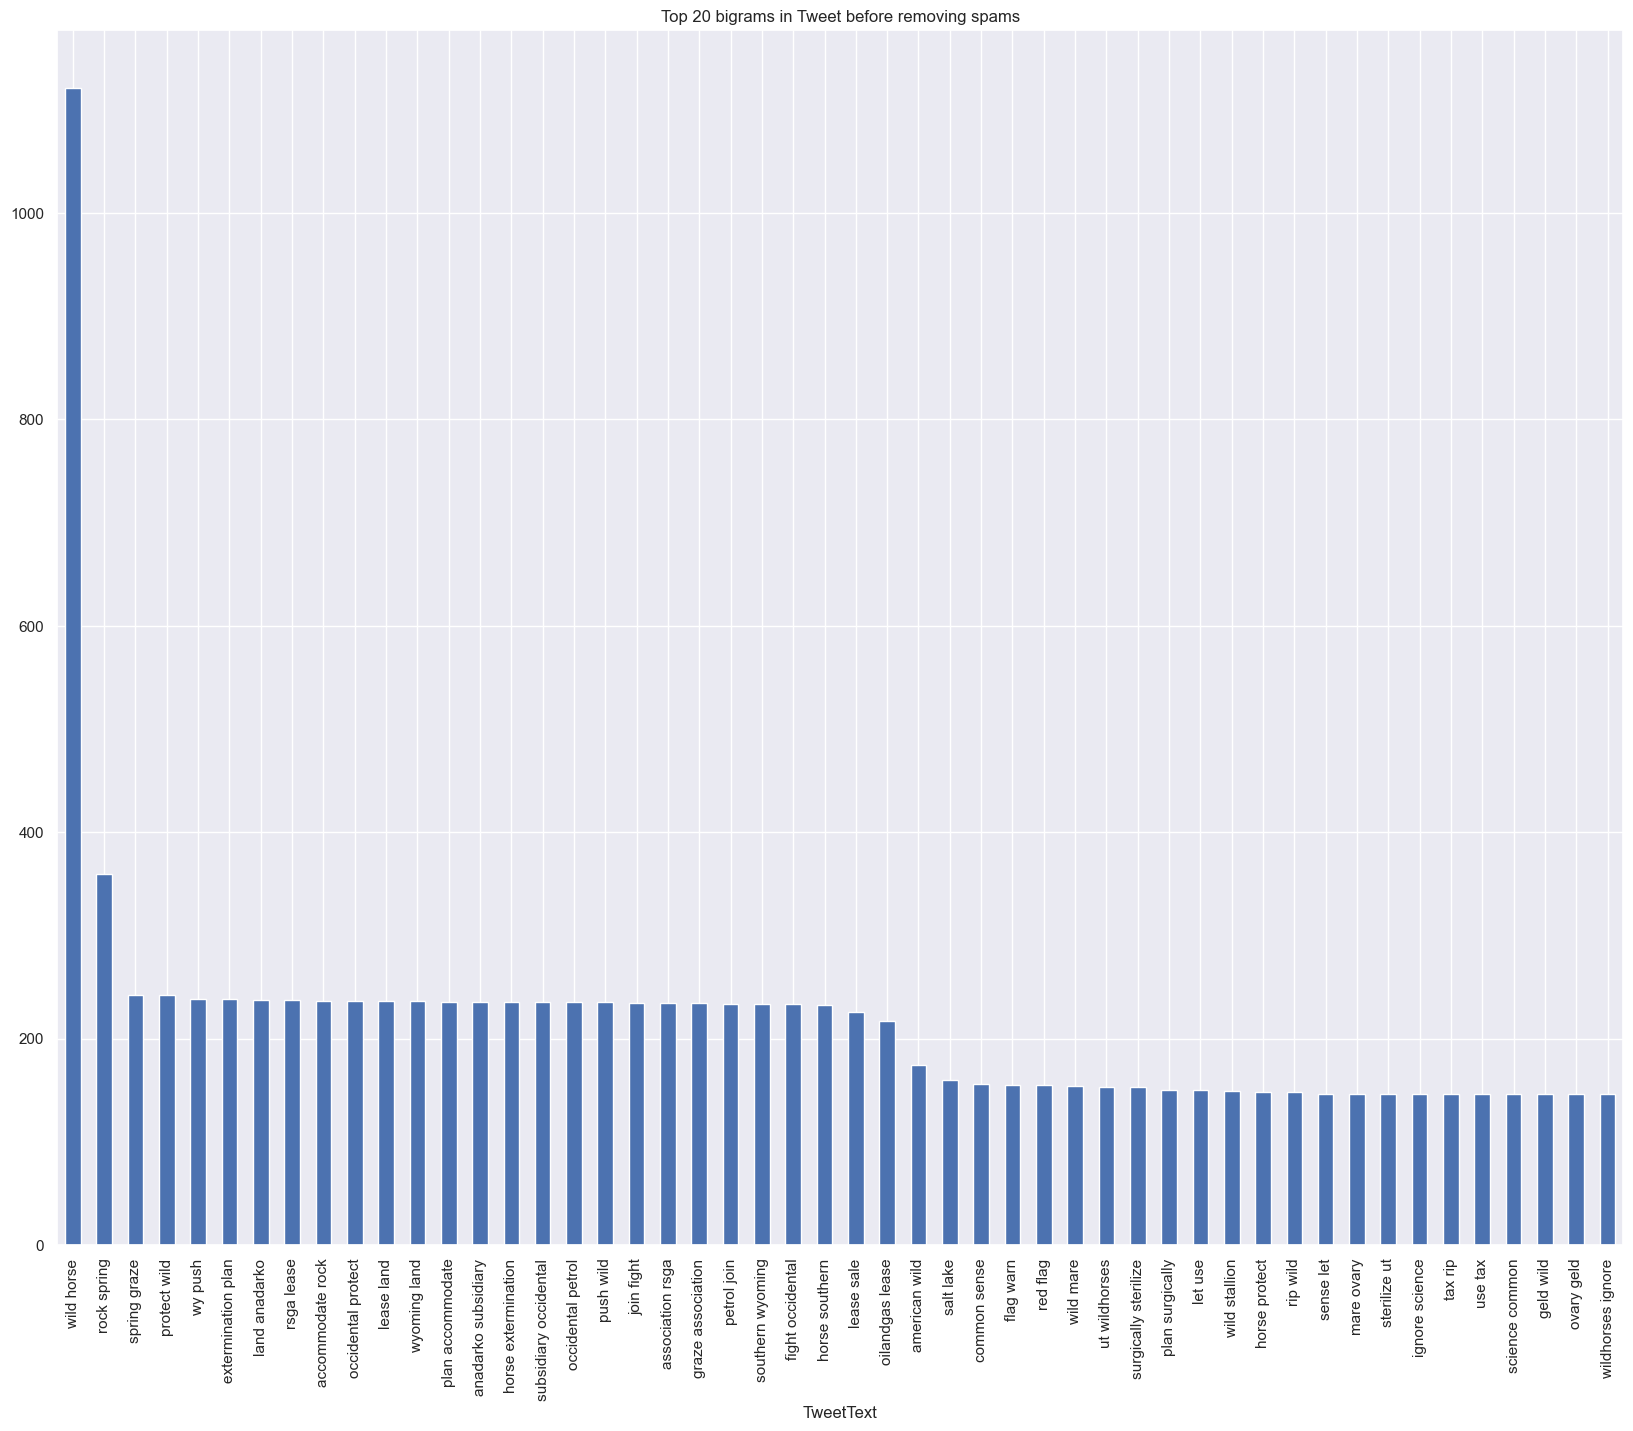

In [17]:
common_bigrams = get_top_n_gram(df['text_without_stopwords_freq'], ngram_range=(2,2), n=50)
all_bigrams = get_top_n_gram(df['text_without_stopwords_freq'], ngram_range=(2,2))
df2 = pd.DataFrame(common_bigrams, columns = ['TweetText' , 'count'])
df2.groupby('TweetText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    title='Top 20 bigrams in Tweet before removing spams')

<AxesSubplot:title={'center':'Top 20 bigrams in Tweet before removing spams'}, xlabel='TweetText'>

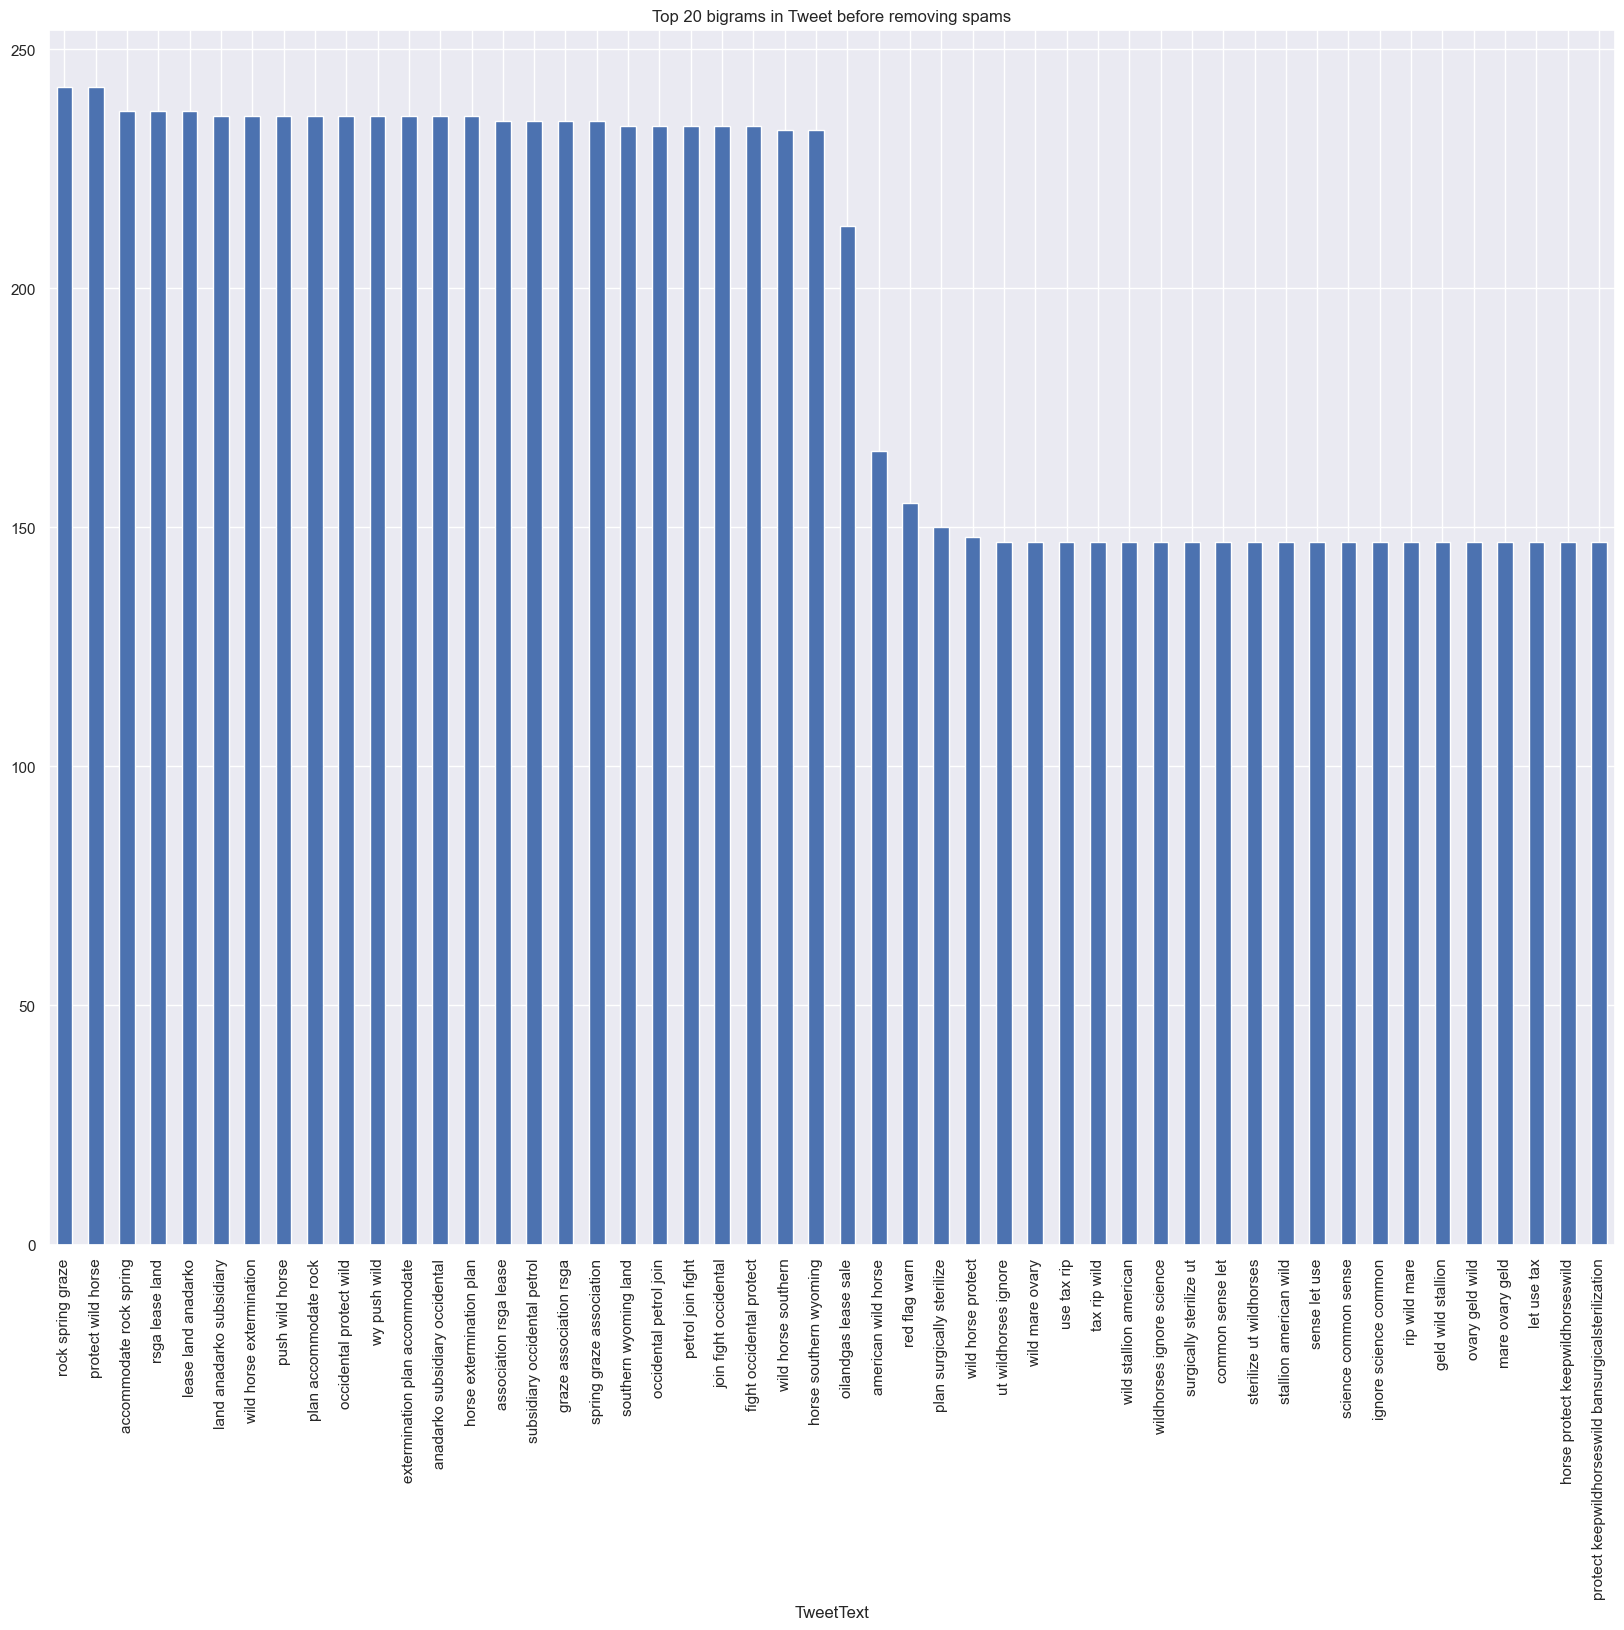

In [16]:
common_trigrams = get_top_n_gram(df['text_without_stopwords_freq'], ngram_range=(3,3), n=50)
all_trigrams = get_top_n_gram(df['text_without_stopwords_freq'], ngram_range=(3,3))
df2 = pd.DataFrame(common_trigrams, columns = ['TweetText' , 'count'])
df2.groupby('TweetText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    title='Top 20 bigrams in Tweet before removing spams')

In [58]:
first_values = [tup[0] for tup in all_bigrams]

In [59]:
first_values

['wild horse',
 'rock spring',
 'spring graze',
 'protect wild',
 'wy push',
 'extermination plan',
 'rsga lease',
 'land anadarko',
 'accommodate rock',
 'lease land',
 'occidental protect',
 'wyoming land',
 'push wild',
 'horse extermination',
 'plan accommodate',
 'anadarko subsidiary',
 'subsidiary occidental',
 'occidental petrol',
 'graze association',
 'association rsga',
 'join fight',
 'petrol join',
 'fight occidental',
 'southern wyoming',
 'horse southern',
 'lease sale',
 'oilandgas lease',
 'american wild',
 'salt lake',
 'common sense',
 'red flag',
 'flag warn',
 'wild mare',
 'ut wildhorses',
 'surgically sterilize',
 'plan surgically',
 'let use',
 'wild stallion',
 'horse protect',
 'rip wild',
 'sterilize ut',
 'wildhorses ignore',
 'ignore science',
 'science common',
 'sense let',
 'use tax',
 'tax rip',
 'mare ovary',
 'ovary geld',
 'geld wild',
 'stallion american',
 'protect keepwildhorseswild',
 'keepwildhorseswild bansurgicalsterilization',
 'lake city',
 '

In [60]:
to_drop = ['wild horse',
 'rock spring',
 'spring graze',
 'protect wild',
 'wy push',
 'extermination plan',
 'rsga lease',
 'land anadarko',
 'accommodate rock',
 'lease land',
 'occidental protect',
 'wyoming land',
 'push wild',
 'horse extermination',
 'plan accommodate',
 'anadarko subsidiary',
 'subsidiary occidental',
 'occidental petrol',
 'graze association',
 'association rsga','petrol join',
 'fight occidental',
 'southern wyoming',
 'horse southern',
 'lease sale',
 'oilandgas lease',
 'american wild',
 'salt lake',]
df4 = df[~df['text'].str.contains('|'.join(to_drop))]